# Analyse des algorithmes de tri

## Motivations et matériel fourni

Étude de quatre algorithmes de tri

* tri sélection
* tri insertion
* tri rapide
* tri fusion

Matériel fourni : 
* un module `tris.py` contenant  quatre fonctions implantant ces algorithmes
* un module `listes.py` contenant des fonctions de création de listes

###  Module `listes`

Le module [`listes`](listes.py) propose quatre fonctions de création de listes d'entiers :

* ``cree_liste_croissante``
* ``cree_liste_decroissante``
* ``cree_liste_melangee``
* ``cree_liste_melangee2``

In [2]:
from listes import *

In [3]:
cree_liste_croissante(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
cree_liste_decroissante(10)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [5]:
cree_liste_melangee(10)

[5, 3, 0, 9, 1, 4, 8, 6, 2, 7]

In [6]:
cree_liste_melangee2(10, 20)

[10, 15, 17, 1, 16, 6, 18, 8, 6, 14]

### Module tris

Le module [`tris`](tris.py) propose un prédicat 
* ``est_trie``

et quatre fonctions de tri
* ``tri_select``
* ``tri_insert``
* ``tri_rapide``
* ``tri_fusion``

In [7]:
from tris import *

In [8]:
est_trie(cree_liste_croissante(10))

True

In [9]:
est_trie(cree_liste_decroissante(10))

False

In [10]:
l = cree_liste_melangee(10)
tri_select(l)
est_trie(l)

True

Les fonctions de tri par sélection, par insertion ou rapide implantent un tri sur place, elles modifient donc l'ordre des éléments de la liste passée en paramètre (et elles ne renvoient rien).

En revanche la fonction de tri fusion construit une nouvelle liste et ne modifie pas celle passéen paramètre.

In [11]:
tri_fusion(cree_liste_melangee(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Les quatre fonctions de tri ont un paramètre optionnel nommé ``comp`` dont la valeur par défaut est une fonction de comparaison qui opère en utilisant l'opérateur de comparaison ``<=`` de Python.

Les fonctions de comparaison qu'on peut attribuer à ce paramètre doivent avoir deux paramètres, disons `x` et `y`, et doivent renvoyer un nombre entier égal à
* -1 si `x` doit être considéré (strictement) plus petit que `y`,
* 1 si `x` doit être considéré (strictement) plus grand que `y`,
* 0 si `x` doit être considéré égal à `y`.

Par exemple si on veut utiliser l'une de ces fonctions pour trier une liste d'entiers dans l'ordre décroissant on peut écrire : 

In [12]:
tri_fusion(cree_liste_melangee(10), 
           comp=lambda x, y: 1 if x < y else -1 if x > y else 0)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## Analyse expérimentale

Il s'agit d'évaluer l'efficacité des quatre algorithmes de tri. 

On le fera d'abord en mesurant le temps nécessaire au tri d'une liste. Intuitivement on comprend bien que ce temps dépend de la longueur de la liste à trier, et qu'il est d'autant plus important que la liste est grande. Autrement dit le temps est certainement une fonction croissante de la longueur de la liste à trier.

Ensuite, on s'intéresse plus particulièrement au nombre de comparaisons d'éléments de la liste nécessaires pour la trier. On verra comment compter ces comparaisons durant le tri d'une liste.


### Mesure du temps

#### Module `timeit`

In [13]:
from timeit import timeit

In [14]:
timeit(setup='from tris import tri_select; from listes import cree_liste_melangee',
       stmt='tri_select(cree_liste_melangee(100))',
       number=100)

0.2315312100108713

Questions méthodologiques :

* mesurer les temps de tri pour des listes dont la taille varie de 0 à une valeur maximale
* quelles listes trier ? (déjà triées dans l'ordre ou dans l'ordre inverse, mélangée ?)
* combien de listes à trier pour chaque taille (paramètre `number` de `timeit`) ?
* pour une taille fixée toujours trier la même liste ou bien chnger de liste à chaque essai ?
* pour comparer les tris entre eux, faire les mesures sur le même jeu de données ?

#### Tri sélection

In [15]:
TAILLE_MAX = 128
NBRE_ESSAIS = 100
temps_select = [timeit(setup='from tris import tri_select; from listes import cree_liste_melangee',
                stmt='tri_select(cree_liste_melangee({:d}))'.format(taille),
                number=NBRE_ESSAIS) for taille in range(TAILLE_MAX)]

In [16]:
%matplotlib inline
import pylab

In [17]:
pylab.plot(list(range(TAILLE_MAX)), temps_select)
pylab.title('Temps du tri par sélection (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('temps en secondes')
pylab.grid()

#### Tri insertion

In [18]:
temps_insert = [timeit(setup='from tris import tri_insert; from listes import cree_liste_melangee',
                stmt='tri_insert(cree_liste_melangee({:d}))'.format(taille),
                number=NBRE_ESSAIS) for taille in range(TAILLE_MAX)]

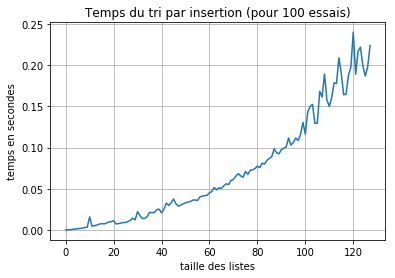

In [19]:
pylab.plot(list(range(TAILLE_MAX)), temps_insert)
pylab.title('Temps du tri par insertion (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('temps en secondes')
pylab.grid()

#### Tri rapide

In [20]:
temps_rapide = [timeit(setup='from tris import tri_rapide; from listes import cree_liste_melangee',
                stmt='tri_rapide(cree_liste_melangee({:d}))'.format(taille),
                number=NBRE_ESSAIS) for taille in range(TAILLE_MAX)]

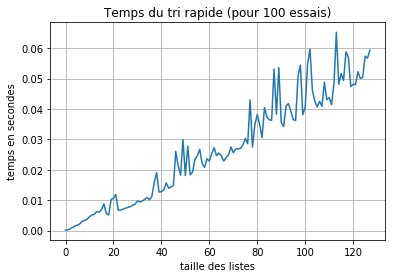

In [21]:
pylab.plot(list(range(TAILLE_MAX)), temps_rapide)
pylab.title('Temps du tri rapide (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('temps en secondes')
pylab.grid()

#### Tri fusion

In [22]:
temps_fusion = [timeit(setup='from tris import tri_fusion; from listes import cree_liste_melangee',
                stmt='tri_fusion(cree_liste_melangee({:d}))'.format(taille),
                number=NBRE_ESSAIS) for taille in range(TAILLE_MAX)]

In [23]:
pylab.plot(list(range(TAILLE_MAX)), temps_fusion)
pylab.title('Temps du tri fusion (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('temps en secondes')
pylab.grid()

#### Conclusion de cette expérience

* Observation comme prévue du temps augmentant avec la taille des données.
* De petites «irrégularités» (du bruit) dans les courbes obtenues. (incertitudes sur les mesures de temps)
* Les temps obtenus incluent le temps de construction des listes. (on pourrait annuler ce surcroît de temps en précalculant une fois pour toute les listes à trier)
* Deux groupes de tri se distinguent :
  * le tri sélection et le tri insertion d'un côté
  * le tri rapide et le tri fusion de l'autre

### Nombre de comparaisons

On ne s'intéresse qu'aux comparaisons **entre éléments de la liste**. Les autres comparaisons (par exemple les indices) ne  sont pas comptabilisées.

#### Comment compter les comparaisons ?

In [24]:
from compare import gen_compteur_compare

In [25]:
help(gen_compteur_compare)

Help on function gen_compteur_compare in module compare:

gen_compteur_compare(comp)
    :param comp: (fonction) une fonction de comparaison. 
    :return: (fonction) une fonction de comparaison identique à ``comp``,
          mais dotée d'un paramètre optionnel permettant d'obtenir le
          nombre d'appels qui a été fait à cette fonction.
    :CU: aucune
    :Exemples:
    
    >>> comp1 = gen_compteur_compare(compare)
    >>> comp1(1, 2)
    -1
    >>> comp1(1, 1)
    0
    >>> comp1(1, 0)
    1
    >>> comp1(nb=True)
    3
    >>> comp2 = gen_compteur_compare (compare)
    >>> comp2(1, 2)
    -1
    >>> comp2(nb=True)
    1
    >>> comp1(nb=True)
    3
    >>> comp1(reset=True)
    >>> comp1(nb=True)
    0



In [26]:
compare_cpt = gen_compteur_compare(compare)

In [27]:
[compare_cpt(k*k, (k+1)**2) for k in range(-5, 5)]

[1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

In [28]:
compare_cpt(nb=True)

10

In [29]:
compare_cpt(reset=True)
compare_cpt(nb=True)

0

In [30]:
tri_fusion(cree_liste_melangee(10), comp=compare_cpt)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
compare_cpt(nb=True)

21

Et voici une fonction générique permettant l'analyse en nombre de comparaisons des tris.

In [32]:
def analyse_tri(tri, nb_essais, taille_max):
    '''
    :param tri: (fonction) une fonction de tri
    :param nb_essais: (int) le nbre d'essais (taille de l'échantillon) pour une taille (de liste à trier) fixée
    :param taille_max: (int) taille maximale des listes à trier
    :return: (list) liste de nbre moyens de comparaisons : à l'indice i on a le nbre moyen de comparaisons
            pour trier des listes de taille i avec la fonction tri
    '''
    nb_comps = []
    for taille in range(taille_max):
        compare_cpt(reset=True)
        for essai in range(nb_essais):
            tri(cree_liste_melangee(taille), comp=compare_cpt)
        nb_comps.append(compare_cpt(nb=True)/nb_essais)
    return nb_comps

#### Tri sélection

In [33]:
nb_comps_select = analyse_tri(tri_select, NBRE_ESSAIS, TAILLE_MAX)

In [34]:
pylab.plot(list(range(TAILLE_MAX)), nb_comps_select)
pylab.title('Nbre moyen de comparaisons pour le tri par sélection (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.grid()

**Remarque :** la courbe est remarquablement «lisse».

Cela provient du fait que le nombre de comparaisons pour trier une liste d'une taille donnée ne dépend pas du contenu de cette liste.

Par exemple, si on trie 10 listes mélangées de longueur 20

In [35]:
nb_comps_select_20 = []
for i in range(10):
    compare_cpt(reset=True)
    tri_select(cree_liste_melangee(20), comp=compare_cpt)
    nb_comps_select_20.append(compare_cpt(nb=True))
nb_comps_select_20

[190, 190, 190, 190, 190, 190, 190, 190, 190, 190]

on obtient toujours 190.

Le nombre de comparaisons pour le tri par selection semble ne dépendre que de la longueur de la liste.

#### Tri insertion

In [36]:
nb_comps_insert = analyse_tri(tri_insert, NBRE_ESSAIS, TAILLE_MAX)

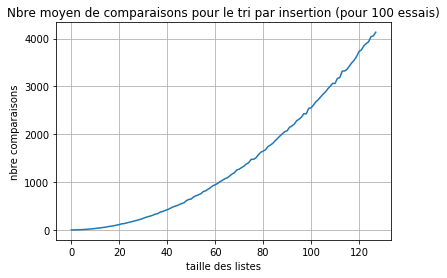

In [37]:
pylab.plot(list(range(TAILLE_MAX)), nb_comps_insert)
pylab.title('Nbre moyen de comparaisons pour le tri par insertion (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.grid()

**Remarques :**

* la courbe n'est pas aussi «lisse» que la précédente
* mais même allure que la précédente
* avec toutefois un nombre moyen de comparaisons qui semble deux fois moindre que pour le tri par sélection.

In [38]:
nb_comps_insert_20 = []
for i in range(10):
    compare_cpt(reset=True)
    tri_insert(cree_liste_melangee(20), comp=compare_cpt)
    nb_comps_insert_20.append(compare_cpt(nb=True))
nb_comps_insert_20

[95, 114, 84, 121, 120, 116, 117, 106, 117, 92]

Le nombre de comparaisons pour le tri par insertion ne dépend pas que de la longueur de la liste.

#### Tri rapide

In [39]:
nb_comps_rapide = analyse_tri(tri_rapide, NBRE_ESSAIS, TAILLE_MAX)

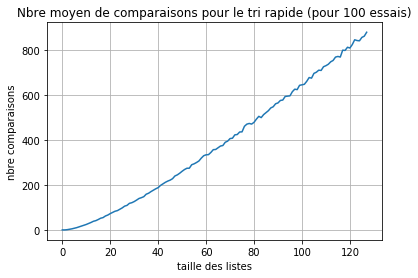

In [40]:
pylab.plot(list(range(TAILLE_MAX)), nb_comps_rapide)
pylab.title('Nbre moyen de comparaisons pour le tri rapide (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.grid()

**Remarques :** 

* Courbe non lisse
* Nombre moyen de comparaisons est largement inférieur à celui des deux tris précédents
* Est-ce une croissance linéaire ?

In [41]:
nb_comps_rapide_20 = []
for i in range(10):
    compare_cpt(reset=True)
    tri_rapide(cree_liste_melangee(20), comp=compare_cpt)
    nb_comps_rapide_20.append(compare_cpt(nb=True))
nb_comps_rapide_20

[64, 85, 73, 67, 70, 62, 69, 74, 60, 59]

Le nombre de comparaisons pour le tri rapide ne dépend pas que de la longueur de la liste.

#### Tri fusion

In [42]:
nb_comps_fusion = analyse_tri(tri_fusion, NBRE_ESSAIS, TAILLE_MAX)

In [43]:
pylab.plot(list(range(TAILLE_MAX)), nb_comps_fusion)
pylab.title('Nbre moyen de comparaisons pour le tri fusion (pour {:d} essais)'.format(NBRE_ESSAIS))
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.grid()

**Remarques :**

* Courbe semblant «lisse»
* Comme pour le tri rapide, nbres moyens de comparaisons très inférieurs à ceux des tris sélection et insertion
* mais semblant légèrement inférieurs à ceux du tri rapide 
* et pourtant les temps étaient en faveur du tri rapide.

In [44]:
nb_comps_fusion_20 = []
for i in range(10):
    compare_cpt(reset=True)
    tri_fusion(cree_liste_melangee(20), comp=compare_cpt)
    nb_comps_fusion_20.append(compare_cpt(nb=True))
nb_comps_fusion_20

[64, 67, 66, 65, 65, 64, 66, 66, 59, 66]

Le nombre de comparaisons pour le tri fusion ne dépend pas que de la longueur de la liste. Mais les variations semblent moindres que celles pour le tri rapide.

### Conclusion

Similarité des «allures de courbes obtenues» temps/nbre comp.

=> justification a posteriori de l'intérêt de s'intéresser au nbre de comp.

Les nombres de comparaisons du tri par selection ne semblent dépendre que de la longueur de la liste à trier. En revanche ce n'est pas le cas pour les trois autres tris.

## Analyse théorique

Nous allons déterminer de manière théorique le nombre de comparaisons effectuées pour trier une liste de longueur $n$.

Comme les expérimentations qui précèdent le montrent, ce nombre de comparaisons dépend naturellement de l'algorithme de tri utilisé, de la longueur de la liste à trier mais aussi peut-être du contenu de cette liste.

Si nous notons $c_{\mathrm{tri}}(\ell)$ le nombre de comparaisons dans le tri par la méthode $\mathrm{tri}$ d'une liste $\ell$ de longueur $n$, alors ce nombre est compris entre deux bornes $c_{\mathrm{tri}}^{min}(n)$ et $c_{\mathrm{tri}}^{max}(n)$ qui ne dépendent que de la longueur de la liste :
$$ c_{\mathrm{tri}}^{min}(n) \leq c_{\mathrm{tri}}(\ell) \leq c_{\mathrm{tri}}^{max}(n),$$
$c_{\mathrm{tri}}^{min}(n)$ désignant le nombre minimal de comparaisons parmi toutes les listes de longueur $n$, et $c_{\mathrm{tri}}^{max}(n)$ le nombre maximal.

Les analyses théoriques se font uniquement à partir de la lecture de l'algorithme et ne nécessitent pas d'exécution.

### Tri sélection

Soit $\ell$ une liste de longueur $n$.

Comme l'algo du tri sélection s'exprime comme une boucle pour, et que les seules comparaisons d'éléments de $\ell$ se font dans la sélection de l'indice du minimum, le nombre de comparaisons du tri sélection de $\ell$ peut s'exprimer par

$$c_{\mathrm{tri\_select}}(\ell) = \sum_{i=0}^{n-2} c_{\mathrm{select\_min}}(\ell, i, n).$$

Il reste à déterminer le nombre de comparaisons $c_{\mathrm{select\_min}}(\ell, i, n)$ pour trouver l'indice du minimum dans la tranche $\ell[i:n]$.

L'algorithme de sélection du minimum s'exprime comme une boucle pour dans laquelle à **chaque étape de l'itération** une seule comparaison est effectuée. Donc

$$ c_{\mathrm{select\_min}}(\ell, i, n) = \sum_{j=i+1}^{n} 1 = n - i.$$

On a donc
$$c_{\mathrm{tri\_select}}(\ell) = \sum_{i=0}^{n-2} (n - i) = \frac{n(n-1)}{2}.$$

On peut noter que ce nombre ne dépend que de la longueur de la liste et donc

$$c_{\mathrm{tri\_select}}(\ell) = c_{\mathrm{tri\_select}}^{min}(n) = c_{\mathrm{tri\_select}}^{max}(n).$$

**Conclusion :**

Le tri sélection effectue $c_{\mathrm{tri\_select}}(n) = \frac{n(n-1)}{2}$ comparaisons d'éléments pour trier une liste de longueur $n$, et ceci quelle que soit la liste.

In [45]:
pylab.plot(list(range(TAILLE_MAX)), [ n*(n-1)/2 for n in range(TAILLE_MAX)], 
           'b', label='Calculé')
pylab.plot(list(range(TAILLE_MAX)), nb_comps_select, 
           'r+', label='Cas moyen (estimé)')
pylab.title('Nbre de comparaisons pour le tri sélection')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

### Tri insertion

Soit $\ell$ une liste de longueur $n$.

De la même façon que pour le tri sélection, puisque l'algo du tri insertion s'exprime par une boucle pour, et que les seules comparaisons d'éléments de $\ell$ se font dans l'insertion d'un élement dans le début de liste,  le nombre de comparaisons du tri insertion de $\ell$ peut s'exprimer par

$$c_{\mathrm{tri\_insert}}(\ell) = \sum_{i=1}^{n-1} c_{\mathrm{inserer}}(\ell, i).$$

Il reste à déterminer le nombre de comparaisons $c_{\mathrm{inserer}}(\ell, i)$ pour insérer l'élément $\ell[i]$ dans  la tranche $\ell[0:i+1]$.

L'algorithme d'insertion s'exprime par une boucle tant que et à chaque étape de l'itération il n'y a qu'une seule comparaison entre éléments de $\ell$. Le nombre de comparaisons dépend donc du nombre d'étapes, et cela dépend donc du contenu de la liste.

Dans le *meilleur des cas* l'élément d'indice $i$ est plus grand (ou égal) que celui d'indice $i-1$, et dans ce cas une seule comparaison suffit à ranger l'élément $\ell[i]$.

Dans le *pire des cas* cet élément est plus petit que tous ceux qui précèdent et doit donc être comparé (une fois) à chacun d'eux, et dans ce cas $i$ comparaisons sont effectuées.

Ainsi, pour tout $i$ compris entre 1 et $n-1$,  on a
$$ 1 \leq c_{\mathrm{inserer}}(\ell, i) \leq i.$$

On peut déduire de l'analyse de l'insertion que 


$$ \sum_{i=1}^{n-1}1 \leq c_{\mathrm{tri\_insert}}(\ell)\leq \sum_{i=1}^{n-1}i,$$
ce qui donne
$$ n-1 \leq c_{\mathrm{tri\_insert}}(\ell)\leq \frac{n(n-1)}{2}.$$

Existe-t-il des listes pour lesquelles le nombre de comparaisons soit égal à la minoration trouvée ci-dessus ? Ce sont celles pour lesquelles pour tout $i$ compris entre 1 et $n-1$ on $\ell[i-1]\leq \ell[i]$, autrement dit les listes triées. De telles listes réalisent le *meilleur des cas* du tri insertion, et le nombre de comparaisons est égal à 
$$c_{\mathrm{tri\_insert}}^{min}(n) = n-1.$$

Et pour la majoration ? Ce sont les listes triées dans l'ordre inverse qui réalisent le *pire des cas*, pour lequel le nombre de comparaisons est égal à 
$$c_{\mathrm{tri\_insert}}^{max}(n) = \frac{n(n-1)}{2}.$$


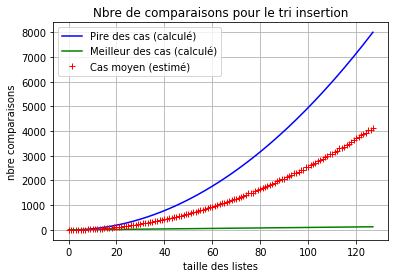

In [46]:
pylab.plot(list(range(TAILLE_MAX)), [ n*(n-1)/2 for n in range(TAILLE_MAX)], 
           'b', label='Pire des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), [n-1 for n in range(TAILLE_MAX)], 
           'g', label='Meilleur des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), nb_comps_insert, 
           'r+', label='Cas moyen (estimé)')
pylab.title('Nbre de comparaisons pour le tri insertion')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

### Tri rapide

#### Cas général

Considérons une liste $\ell$ de longueur $n$.

Si $n=0$ ou $1$, alors nous sommes dans un cas de base du tri rapide, et aucune comparaisons d'éléments n'est effectuée, donc

$$ c_{\mathrm{rapide}}(\ell) = 0.$$

Si $n\geq 2$. Alors le partitionnement amène à trier deux listes : 
* la liste $\ell_1$ des éléments plus petits que le pivot
* et la liste $\ell_2$ des éléments plus grands

dont la somme des longueurs est $n-1$. L'opération de partitionnement est réalisée en comparant le pivot choisi avec chacun des autres éléments de la liste. Le nombre de comparaisons dans le tri rapide de $\ell$ comprend donc

1. le nombre de comparaisons dans l'opération de partitionnement, donc $n-1$ ;
2. le nombre de comparaisons dans le tri rapide de $\ell_1$, donc $c_{\mathrm{rapide}}(\ell_1)$ ;
3. et le nombre de comparaisons dans le tri rapide de $\ell_2$, donc $c_{\mathrm{rapide}}(\ell_2)$.

On a donc lorsque $n\geq 2$

$$ c_{\mathrm{rapide}}(\ell) = c_{\mathrm{rapide}}(\ell_1) + c_{\mathrm{rapide}}(\ell_2) + n-1.$$



#### Pire des cas

Dans le pire des cas, cas où à chaque appel récursif le pivot place un élément d'un côté et tous les autres de l'autre, autrement dit $\ell_1$ est vide et $\ell_2$ est de longueur $n-1$ (ou vice-versa).

$$ c_{rapide}^{max}(n) = \left\{\begin{array}{lll}
  0 &\mbox{si} & n \leq 1\\
    c_{rapide}^{max}(n-1) + n-1 &\mbox{ sinon.}&
\end{array}
\right.                       
$$

On en déduit facilement que pour tout entier $n\in\mathbb{N}$ on a

$$ c_{rapide}^{max}(n) = \frac{n(n-1)}{2}.$$

Dans le pire des cas le tri fusion ne se comporte pas mieux que les tri sélection et insertion.

Le pire des cas dans le cas où, à chaque appel récursif, le choix du pivot est le premier élément, correspond au cas où la liste est déjà triée (ou triée dans l'ordre décroissant). C'est le choix de pivot que fait l'implantation du tri rapide dans le module `tris`.

In [47]:
n = 30
compare_cpt(reset=True)
tri_rapide(cree_liste_croissante(n), comp=compare_cpt)
compare_cpt(nb=True) - n*(n-1)//2

0

#### Meilleur des cas

Dans le meilleur des cas, cas où à chaque appel récursif le pivot partage la liste en deux listes d'égales longueurs (à 1 près), on a 

$$
c_{rapide}^{min}(n) = \left\{\begin{array}{lll}
  0 &\mbox{si} & n \leq 1\\
c_{rapide}^{min}(\lfloor\frac{n-1}{2}\rfloor) 
+ c_{rapide}^{min}(\lceil\frac{n-1}{2}\rceil) + n-1 &\mbox{ sinon.}&
\end{array}
\right.                       
$$

In [48]:
def c_rapide_min(n):
    '''
    :param n: (int) taille d'une liste
    :return: (int) nbre minimal de comparaisons dans le tri rapide 
                   d'une liste de longueur n.
    :CU: n >= 0
    '''
    if n <= 1:
        return 0
    else:
        n1 = (n-1) // 2
        n2 = n - 1 - n1
        return c_rapide_min(n1) + c_rapide_min(n2) + n - 1

In [49]:
[c_rapide_min(n) for n in range(20)]

[0, 0, 1, 2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 34, 38, 42, 46, 50]

#### Comparaison des meilleur et pire cas avec les nombres de comparaisons moyens estimés

In [50]:
pylab.plot(list(range(TAILLE_MAX)), [ n*(n-1)/2 for n in range(TAILLE_MAX)], 
           'b', label='Pire des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), [ c_rapide_min(n) for n in range(TAILLE_MAX)], 
           'g', label='Meilleur des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), nb_comps_rapide, 
           'r', label='Cas moyen (estimé)')
pylab.title('Nbre de comparaisons pour le tri rapide')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

On peut constater sur ce graphique qu'en moyenne le tri rapide est (probablement) plus proche du meilleur des cas que du pire. Voyons le même graphique sans le pire des cas.

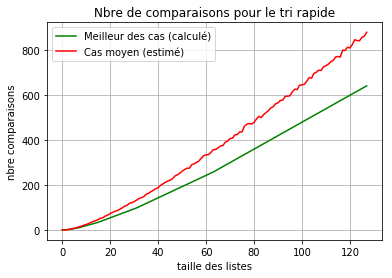

In [51]:
pylab.plot(list(range(TAILLE_MAX)), [ c_rapide_min(n) for n in range(TAILLE_MAX)], 
           'g', label='Meilleur des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), nb_comps_rapide, 
           'r', label='Cas moyen (estimé)')
pylab.title('Nbre de comparaisons pour le tri rapide')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

#### Que dire de l'ordre de grandeur asymptotique du coût dans le meilleur des cas ?

On ne va s'intéresser qu'au cas où la longueur des listes est de la forme 
$$ n = 2^p - 1,$$
$p$ étant un entier naturel quelconque.

Pourquoi s'intéresser à de telles longueurs ? Parce qu'après partionnement dans le meilleur des cas on obtient deux listes de longueurs égales à $2^{p-1}-1$. Et cela simplifie considérablement l'équation de récurrence du meilleur des cas puisqu'on n'a plus besoin des parties entières. Et on a alors

$$
c_{rapide}^{min}(2^p - 1) = \left\{\begin{array}{lll}
  0 &\mbox{si} & p \leq 0\\
2c_{rapide}^{min}(2^{p-1}-1) + 2^p-2 &\mbox{ sinon.}&
\end{array}
\right.                       
$$

Cette équation résolue donne 
$$ c_{rapide}^{min}(2^p - 1) = p.2^{p} - 2.2^{p} + 2,$$

ce qui, exprimé en fonction de $n$, donne

$$c_{rapide}^{min}(n) = (n+1)\log_2{(n+1)} - 2n.$$

Cette formule n'est valide que pour des entiers $n$ de la forme $n=2^p-1$. Mais on peut montrer que pour tout entier $n$ on a
$$ (n+1)\log_2{(n+1)} - 2n \leq c_{rapide}^{min}(n) \leq (n+1)\log_2{(n+1)}.$$

On retient de cela que le coût du tri rapide dans le meilleur des cas est en  $\Theta(n\log{n})$ qui exprime l'ordre de grandeur asymptotique en ne retenant que le terme dominant.

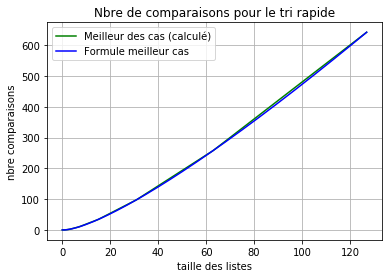

In [52]:
from math import log
pylab.plot(list(range(TAILLE_MAX)), [ c_rapide_min(n) for n in range(TAILLE_MAX)], 
           'g', label='Meilleur des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), [(n+1)*log(n+1, 2) -2*n 
                                     for n in range(TAILLE_MAX)], 
           'b', label='Formule meilleur cas')
pylab.title('Nbre de comparaisons pour le tri rapide')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

In [53]:
pylab.plot(list(range(TAILLE_MAX)), [c_rapide_min(n) - ((n+1)*log(n+1, 2)- 2*n) 
                                     for n in range(TAILLE_MAX)], 
           color='b', label='Formule meilleur cas')
pylab.title('Tri rapide différence')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

### Tri fusion

#### Cas général

Comme pour le tri rapide, le tri fusion s'exprimant de manière récursive, le nombre de comparaisons sera défini par une relation de récurrence.

Soit donc $\ell$ une liste de longueur $n$.

Si $n \leq1$, alors
$$c_{\mathrm{tri\_fusion}}(\ell) = 0.$$

Si $n\geq 2$. Alors la séparation amène à trier deux listes $\ell_1$ et $\ell_2$ de longueurs $\lfloor\frac{n}{2}\rfloor$ et $\lceil\frac{n}{2}\rceil$. Cette séparation ne nécessite aucune comparaison.

Le nombre de comparaisons dans le tri fusion de $\ell$ comprend donc

1. le nombre de comparaisons dans chacun des deux appels récursifs pour trier les listes $\ell_1$ et
   $\ell_2$ ;
2. et le nombre de comparaisons pour fusionner les deux listes triées obtenues après ces appels récursifs.

On a donc lorsque $n\geq 2$
$$ c_{\mathrm{tri\_fusion}}(\ell)  = c_{\mathrm{tri\_fusion}}(\ell_1) + c_{\mathrm{tri\_fusion}}(\ell_2) + c_{\mathrm{fusion}}(\ell_1', \ell_2'),$$
où  $\ell_1'$ et $\ell_2'$ sont les versions triées des deux sous-listes.

Il reste donc à évaluer le nombre de comparaisons nécessaires à fusionner deux listes triées de longueurs $\lfloor\frac{n}{2}\rfloor$ et $\lceil\frac{n}{2}\rceil$.

On peut encadrer ce nombre par
$$ \lfloor\frac{n}{2}\rfloor \leq c_{\mathrm{fusion}}(\ell_1', \ell_2') \leq n - 1.$$

La minoration est atteinte lorsque la plus petite des deux listes a ses éléments tous inférieurs à ceux de l'autre, et la majoration lorsque dans la liste résultante de la fusion il y a alternance entre des éléments provenant de chacune des deux listes.

#### Meilleur des cas

$$ c_{\mathrm{tri\_fusion}}^{min}(n) = c_{\mathrm{tri\_fusion}}^{min}(\lfloor\frac{n}{2}\rfloor) + c_{\mathrm{tri\_fusion}}^{min}(\lceil\frac{n}{2}\rceil) + \lfloor\frac{n}{2}\rfloor.$$

In [54]:
def c_fusion_min(n):
    '''
    :param n: (int) taille d'une liste
    :return: (int) nbre minimal de comparaisons dans le tri fusion 
                   d'une liste de longueur n.
    :CU: n >= 0
    '''
    if n <= 1:
        return 0
    else:
        n1 = n // 2
        n2 = n - n1
        return c_fusion_min(n1) + c_fusion_min(n2) + n1

In [56]:
[c_fusion_min(n) for n in range(20)]

[0, 0, 1, 2, 4, 5, 7, 9, 12, 13, 15, 17, 20, 22, 25, 28, 32, 33, 35, 37]

#### Pire des cas

$$ c_{\mathrm{tri\_fusion}}^{max}(n) = c_{\mathrm{tri\_fusion}}^{max}(\lfloor\frac{n}{2}\rfloor) + c_{\mathrm{tri\_fusion}}^{max}(\lceil\frac{n}{2}\rceil) + n-1.$$

In [61]:
def c_fusion_max(n):
    '''
    :param n: (int) taille d'une liste
    :return: (int) nbre maximal de comparaisons dans le tri fusion 
                   d'une liste de longueur n.
    :CU: n >= 0
    '''
    if n <= 1:
        return 0
    else:
        n1 = n // 2
        n2 = n - n1
        return c_fusion_max(n1) + c_fusion_max(n2) + n - 1

In [62]:
[c_fusion_max(n) for n in range(20)]

[0, 0, 1, 3, 5, 8, 11, 14, 17, 21, 25, 29, 33, 37, 41, 45, 49, 54, 59, 64]

#### Comparaison des meilleur et pire cas avec les nombres de comparaisons moyens estimés

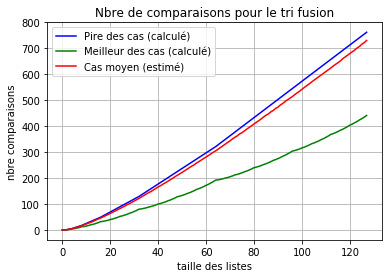

In [63]:
pylab.plot(list(range(TAILLE_MAX)), [c_fusion_max(n) for n in range(TAILLE_MAX)], 
           'b', label='Pire des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), [c_fusion_min(n) for n in range(TAILLE_MAX)], 
           'g', label='Meilleur des cas (calculé)')
pylab.plot(list(range(TAILLE_MAX)), nb_comps_fusion, 
           'r', label='Cas moyen (estimé)')
pylab.title('Nbre de comparaisons pour le tri fusion')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

#### Ordre de grandeur asymptotique

##### Meilleur des cas

On considère des listes de longueur $n=2^p$, $p\in\mathbb{N}$.

L'équation de récurrence s'exprime alors, pour $p\leq 1$ sous la forme

$$c_{\mathrm{tri\_fusion}}^{min}(2^p) = 2c_{\mathrm{tri\_fusion}}^{min}(2^{p-1}) + 2^{p-1},$$
et pour $p=0$ on a
$$c_{\mathrm{tri\_fusion}}^{min}(1) = 0.$$

On peut déterminer alors que pour tout entier $p$ on a
$$ c_{\mathrm{tri\_fusion}}^{min}(2^p) = p2^{p-1},$$
ce qui ramené en $n$ donne
$$ c_{\mathrm{tri\_fusion}}^{min}(n) = \frac{n\log_2{n}}{2}.$$

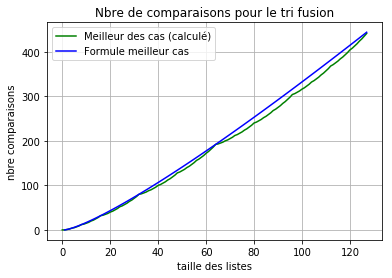

In [66]:
pylab.plot(list(range(TAILLE_MAX)), [c_fusion_min(n) for n in range(TAILLE_MAX)], 
           'g', label='Meilleur des cas (calculé)')
pylab.plot(list(range(1, TAILLE_MAX)), [n*log(n, 2)/2 
                                     for n in range(1, TAILLE_MAX)], 
           'b', label='Formule meilleur cas')
pylab.title('Nbre de comparaisons pour le tri fusion')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

Ce graphique semble montrer que l'approximation du meilleur des cas par $\frac{n\log_2{n}}{2}$ est plutôy bonne quoique légèrement supérieure à la réalité. 

Voyons ce que donne la différence.

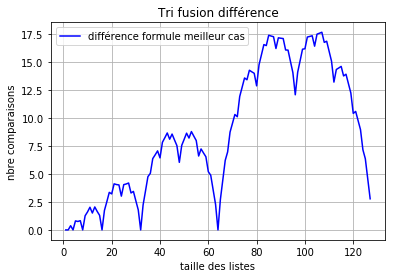

In [71]:
pylab.plot(list(range(1, TAILLE_MAX)), [n*log(n, 2)/2 - c_fusion_min(n) 
                                     for n in range(1, TAILLE_MAX)], 
           color='b', label='différence formule meilleur cas')
pylab.title('Tri fusion différence')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

##### Pire des cas

Toujours pour des listes de longueur $n=2^p$, $p\in\mathbb{N}$.

L'équation de récurrence s'exprime alors, pour $p\leq 1$ sous la forme

$$c_{\mathrm{tri\_fusion}}^{max}(2^p) = 2c_{\mathrm{tri\_fusion}}^{max}(2^{p-1}) + 2^p - 1,$$
et pour $p=0$ on a
$$c_{\mathrm{tri\_fusion}}^{max}(1) = 0.$$

On peut déterminer alors que pour tout entier $p$ on a
$$ c_{\mathrm{tri\_fusion}}^{max}(2^p) = p2^{p} - 2^p + 1,$$
ce qui ramené en $n$ donne
$$ c_{\mathrm{tri\_fusion}}^{max}(n) = n\log_2{n} - n + 1.$$

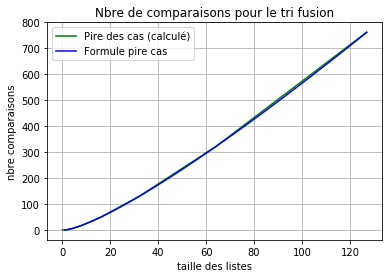

In [73]:
pylab.plot(list(range(TAILLE_MAX)), [c_fusion_max(n) for n in range(TAILLE_MAX)], 
           'g', label='Pire des cas (calculé)')
pylab.plot(list(range(1, TAILLE_MAX)), [n*log(n, 2) - n  + 1
                                     for n in range(1, TAILLE_MAX)], 
           'b', label='Formule pire cas')
pylab.title('Nbre de comparaisons pour le tri fusion')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

Bonne approximation.

Voyons la différence.

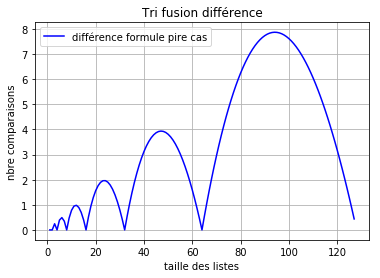

In [74]:
pylab.plot(list(range(1, TAILLE_MAX)), [c_fusion_max(n) - (n*log(n,2) - n + 1)
                                     for n in range(1, TAILLE_MAX)], 
           color='b', label='différence formule pire cas')
pylab.title('Tri fusion différence')
pylab.xlabel('taille des listes')
pylab.ylabel('nbre comparaisons')
pylab.legend()
pylab.grid()

### Conclusion

Les analyses théoriques des tris confirment globalement ce qu'on avait pu établir expérimentalement. Elles nous ont appris néanmoins deux points que l'étude expérimentale ne révélait pas :

1. dans le meilleur des cas le tri insertion est linéaire.

2. le tri fusion est meilleur que le tri rapide dans le pire des cas. Cependant dans la pratique, le tri rapide est plus performant que le tri fusion car il opère sur place.

Voici un tableau récapitulatif 

|tri       | meilleur des cas        | pire des cas      |
|----------|-------------------------|-------------------|
|sélection | $\frac{n(n-1)}{2}$      | $\frac{n(n-1)}{2}$|
|insertion | $n-1$                   | $\frac{n(n-1)}{2}$|
|rapide    | $\Theta(n\log{n})$ | $\frac{n(n-1)}{2}$|
|fusion    | $\Theta(n\log{n})$ | $\Theta(n\log{n})$|

## Exercices

### Méthode ``sort``

Les listes en Python disposent d'une méthode ``sort``. Faîtes une étude expérimentale de cette méthode. Si cette méthode est programmée avec l'un des quatre algorithmes étudiés ici, le(s)quel(s) pourrai(en)t il(s) être ?

### Opérateur ``in``

L'opérateur ``in`` de Python permet de tester l'appartenance d'un élément à une liste.
Réalisez une étude expérimentale de cet opérateur. Est-il aussi efficace qu'on pourrait l'espérer sur des listes triées ?

### Meilleur des cas du tri rapide

En supposant que dans le tri rapide le choix du pivot est toujours le premier élément de la liste à trier, donnez un exemple de liste de longueur 15 réalisant le meilleur des cas.